In [1]:
import pandas as pd
import math as m 
import numpy as np

In [2]:
df = pd.read_csv('Heart disease.csv')

In [3]:
df.head(4)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes


In [4]:
df.shape


(319795, 18)

In [5]:
df1=df.copy
df2=df.copy

# Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [9]:
y=df['HeartDisease']
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [10]:
x=df.copy()
x=df.drop('HeartDisease', axis=1)
x.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0


# Xgboost

In [11]:
!pip install xgboost

In [12]:
import xgboost 
from xgboost import XGBClassifier

In [13]:
xgb = XGBClassifier()

# Adaboost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
ada = AdaBoostClassifier()

# Undersampling

In [16]:
from imblearn.under_sampling import NearMiss

In [17]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [18]:
new_y.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

# ACCURACY USING XGBOOST

In [19]:
from sklearn.model_selection import KFold, cross_val_score

In [20]:
kfold = KFold(n_splits=4) #each fold contain 25% data

In [21]:
result = cross_val_score(xgb, new_x , new_y,cv=kfold) 

In [22]:
result

array([0.86717323, 0.71914956, 0.81250913, 0.80754055])

In [23]:
result.max()

0.8671732300723314

 # ACCURACY USING ADABOOST

In [24]:
result1 = cross_val_score(xgb, new_x , new_y,cv=kfold) 

In [25]:
result1

array([0.86717323, 0.71914956, 0.81250913, 0.80754055])

In [26]:
result1.max()

0.8671732300723314

# Accuracy using Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier() 

In [29]:
result2 = cross_val_score(clf, new_x , new_y,cv=kfold) 

In [30]:
result2

array([0.25345218, 0.60889896, 0.79066199, 0.78846997])

In [31]:
result2.max()

0.7906619903551074

# Accuracy using Logisitic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [75]:
 result3 = cross_val_score(lr, new_x , new_y,cv=kfold) 

In [77]:
result3

array([0.91758603, 0.77818368, 0.76640362, 0.74974426])

In [78]:
result3.max()

0.9175860305399284

# Accuracy using Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rd = RandomForestClassifier()

In [39]:
result3 = cross_val_score(rd, new_x , new_y,cv=kfold) 

In [41]:
result3

array([0.14495507, 0.60809527, 0.80461786, 0.80293731])

In [43]:
result3.max()

0.8046178576647669

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#Assign Parameters
n_estimators = np.random.randint(15,200,40)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = np.random.randint(1,10,20)
min_samples_split = np.random.randint(1,10,15) #[1,2,3,4]
min_samples_leaf= np.random.randint(1,4,15)  #[ 1,2,3,4]

parameters = {
    'n_estimators'  : n_estimators,
    'criterion' : criterion,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [46]:
print(parameters)

{'n_estimators': array([117, 197, 171, 185,  76,  77, 187,  45, 183, 124,  15,  39, 191,
       149,  94,  83, 106, 107, 103,  80, 192,  52,  73,  34, 178,  43,
       198, 144, 117,  37,  72,  87, 195, 199,  34, 148,  76, 109, 145,
        71]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([3, 8, 7, 8, 9, 4, 8, 1, 3, 6, 4, 6, 6, 6, 4, 9, 8, 8, 2, 3]), 'min_samples_split': array([4, 1, 7, 7, 8, 3, 7, 7, 3, 6, 3, 5, 2, 9, 1]), 'min_samples_leaf': array([3, 1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1])}


In [47]:
random_forest = RandomForestClassifier()

In [48]:
r = RandomizedSearchCV(random_forest , parameters, n_iter = 300, cv = 3)

In [53]:
result4 = cross_val_score(r, new_x , new_y,cv=kfold) 

# After tuning in Random Forest

In [54]:
result4

array([0.93088332, 0.81442244, 0.77349116, 0.76318866])

In [55]:
result4.max()

0.9308833199386279

In [56]:

from sklearn.neighbors import KNeighborsRegressor

In [62]:
from sklearn.model_selection import RandomizedSearchCV

model_rs = KNeighborsRegressor(n_neighbors=2)
k_range=list(range(5, 100))
options=['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=options)

rand_search = RandomizedSearchCV(model_rs,
                           param_grid)



RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']})

In [58]:
result5 = cross_val_score(rand_search, new_x , new_y,cv=kfold) 

In [59]:
result5

array([    0.        , -1294.24332082,     0.        ,     0.        ])

0.117384744723532

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
knr = KNeighborsRegressor(n_neighbors=2)

In [69]:
knr.fit(new_x,new_y)

KNeighborsRegressor(n_neighbors=2)

In [70]:
knr.score(new_x,new_y)

0.7882402367296241

In [66]:
yyy = cross_val_score(knr, new_x , new_y,cv=kfold) 

In [67]:
yyy

array([    0.       , -3141.7296142,     0.       ,     0.       ])

In [79]:
yyy.max()

0.0

# Accuracy using SVM

In [87]:
df.head(4)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1


In [88]:
import matplotlib.pyplot as plt

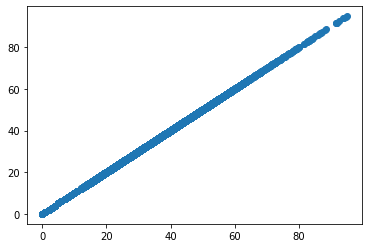

In [90]:
plt.scatter(df.drop('Smoking',axis=1),df.drop('Smoking',axis=1))

In [93]:
# dff1 = df[df.smoking == 0]
# dff2 = df[df.smoking == 1]

# plt.scatter(df.drop('Smoking',axis=1), color='green', label='class 0')
# plt.scatter(df.drop('Smoking',axis=1), color='red', label='class 1')

# plt.legend()

In [94]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [96]:
result7 = cross_val_score(svm, new_x , new_y,cv=kfold) 

In [97]:
result7

array([0.9474684 , 0.8020019 , 0.76633056, 0.72994301])

In [98]:
result7.max()

0.9474684006721706

In [99]:
result7.min()

0.7299430074528716